In [1]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv('housing.csv')

In [104]:
print(df.head())
print(df.shape)
print(df.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
(20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries

In [105]:
df.dropna(inplace=True) #inplace=True --> saves the result in the data object again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [106]:
from sklearn.model_selection import train_test_split

x = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [107]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2)

In [108]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16552,-121.23,37.84,28.0,1347.0,241.0,713.0,225.0,4.0208,INLAND,155700.0
8009,-118.11,33.86,36.0,2750.0,487.0,1386.0,458.0,4.9904,<1H OCEAN,221700.0
8269,-118.16,33.77,30.0,4439.0,1105.0,1749.0,1011.0,3.8984,NEAR OCEAN,306300.0
16832,-122.50,37.59,36.0,1521.0,253.0,736.0,241.0,4.3542,NEAR OCEAN,237500.0
8450,-118.35,33.91,31.0,2583.0,663.0,1675.0,612.0,3.5234,<1H OCEAN,265000.0
...,...,...,...,...,...,...,...,...,...,...
245,-122.21,37.78,43.0,1702.0,460.0,1227.0,407.0,1.7188,NEAR BAY,126800.0
7039,-118.09,33.95,32.0,1083.0,206.0,737.0,218.0,3.5583,<1H OCEAN,170800.0
7548,-118.20,33.92,39.0,1050.0,217.0,895.0,207.0,3.1538,<1H OCEAN,155600.0
8230,-118.20,33.77,24.0,2404.0,819.0,1566.0,753.0,1.5076,NEAR OCEAN,145800.0


In [109]:
train_data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,7221
INLAND,5203
NEAR OCEAN,2108
NEAR BAY,1810
ISLAND,4


In [110]:
# Apply one-hot encoding to the 'ocean_proximity' column
train_data = pd.get_dummies(train_data, columns=['ocean_proximity'], drop_first=True)

# Display the first few rows of the encoded dataframe to verify the changes
display(train_data.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
16552,-121.23,37.84,28.0,1347.0,241.0,713.0,225.0,4.0208,155700.0,True,False,False,False
8009,-118.11,33.86,36.0,2750.0,487.0,1386.0,458.0,4.9904,221700.0,False,False,False,False
8269,-118.16,33.77,30.0,4439.0,1105.0,1749.0,1011.0,3.8984,306300.0,False,False,False,True
16832,-122.50,37.59,36.0,1521.0,253.0,736.0,241.0,4.3542,237500.0,False,False,False,True
8450,-118.35,33.91,31.0,2583.0,663.0,1675.0,612.0,3.5234,265000.0,False,False,False,False


<Axes: >

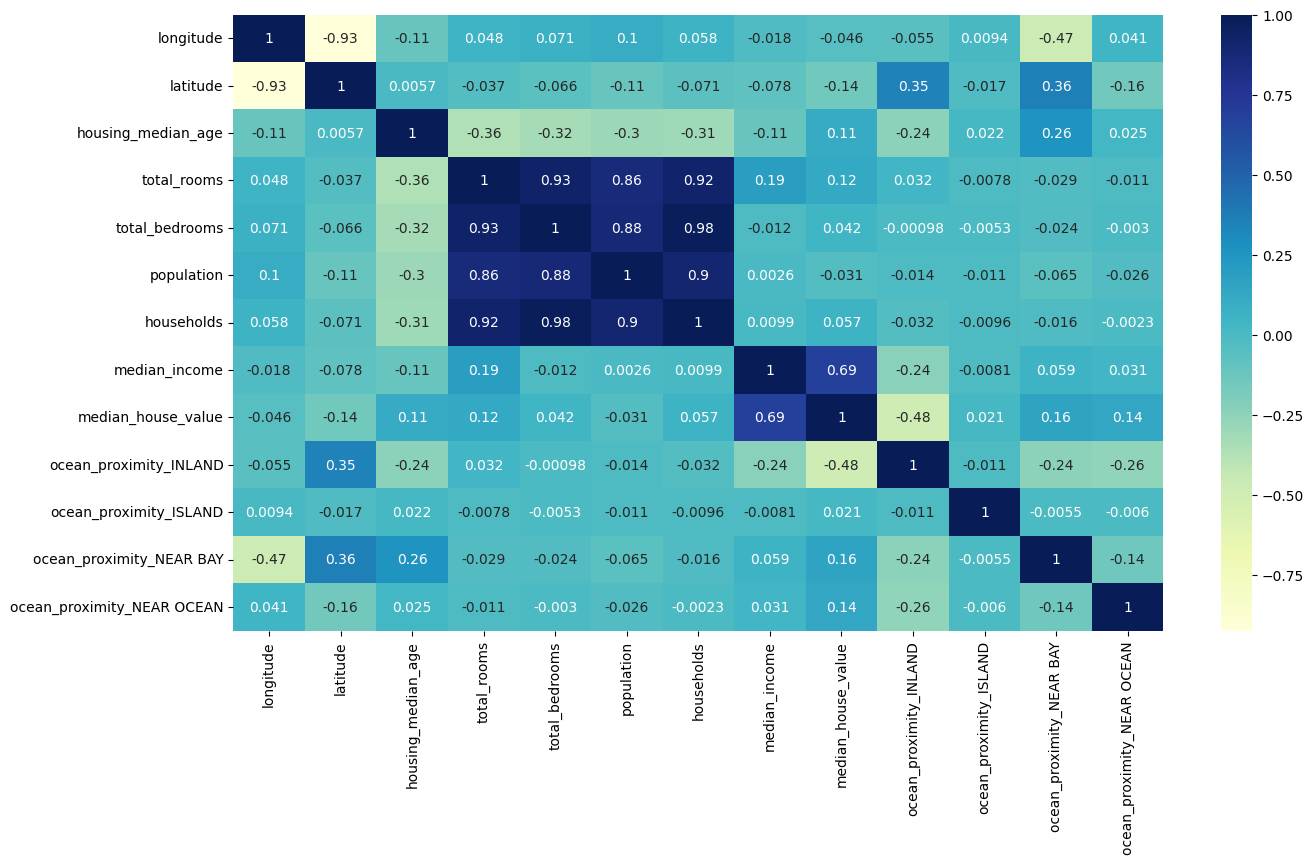

In [111]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr() , annot=True, cmap='YlGnBu')

In [112]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

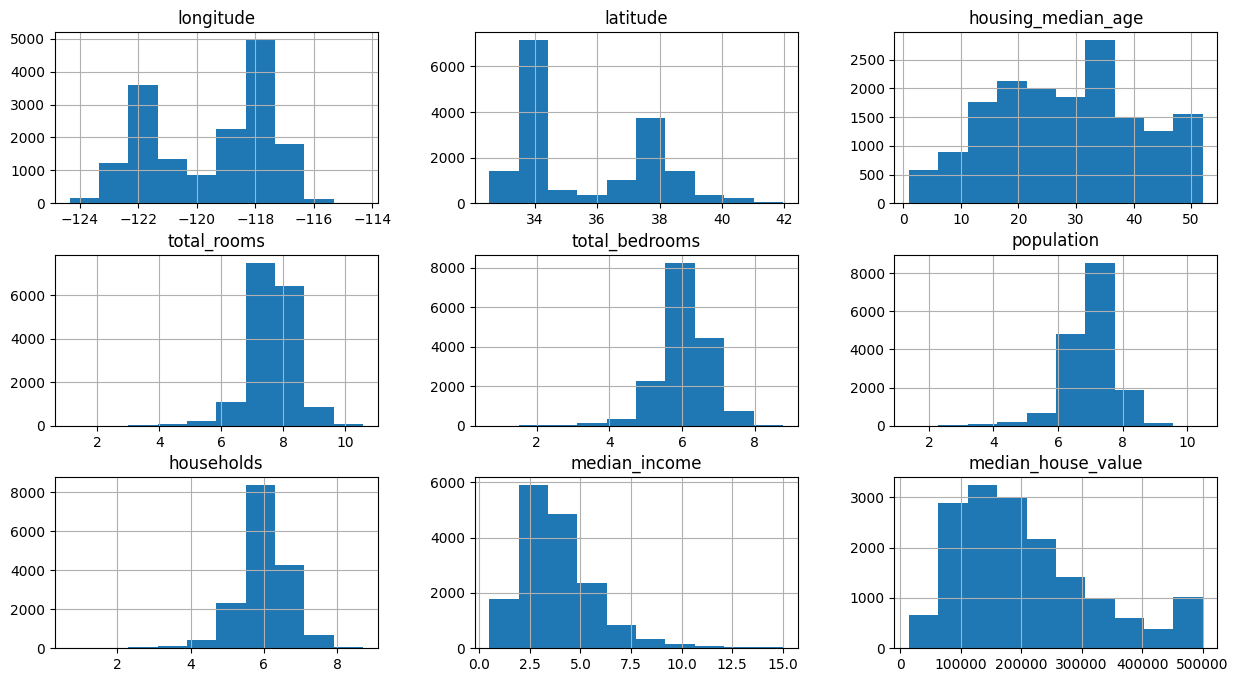

In [113]:
train_data.hist(figsize=(15, 8))

<Axes: xlabel='longitude', ylabel='latitude'>

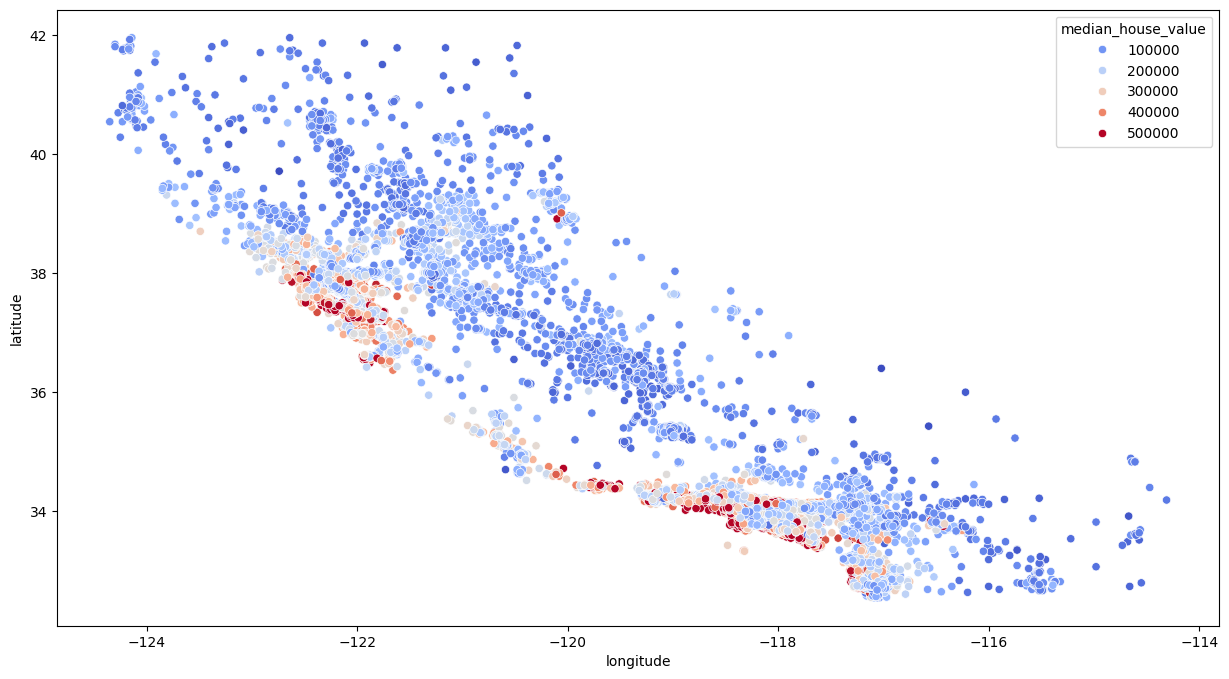

In [114]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', data=train_data, palette="coolwarm")

In [115]:
train_data['bedrooms_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['rooms_per_household'] = train_data['total_rooms'] / train_data['households']

<Axes: >

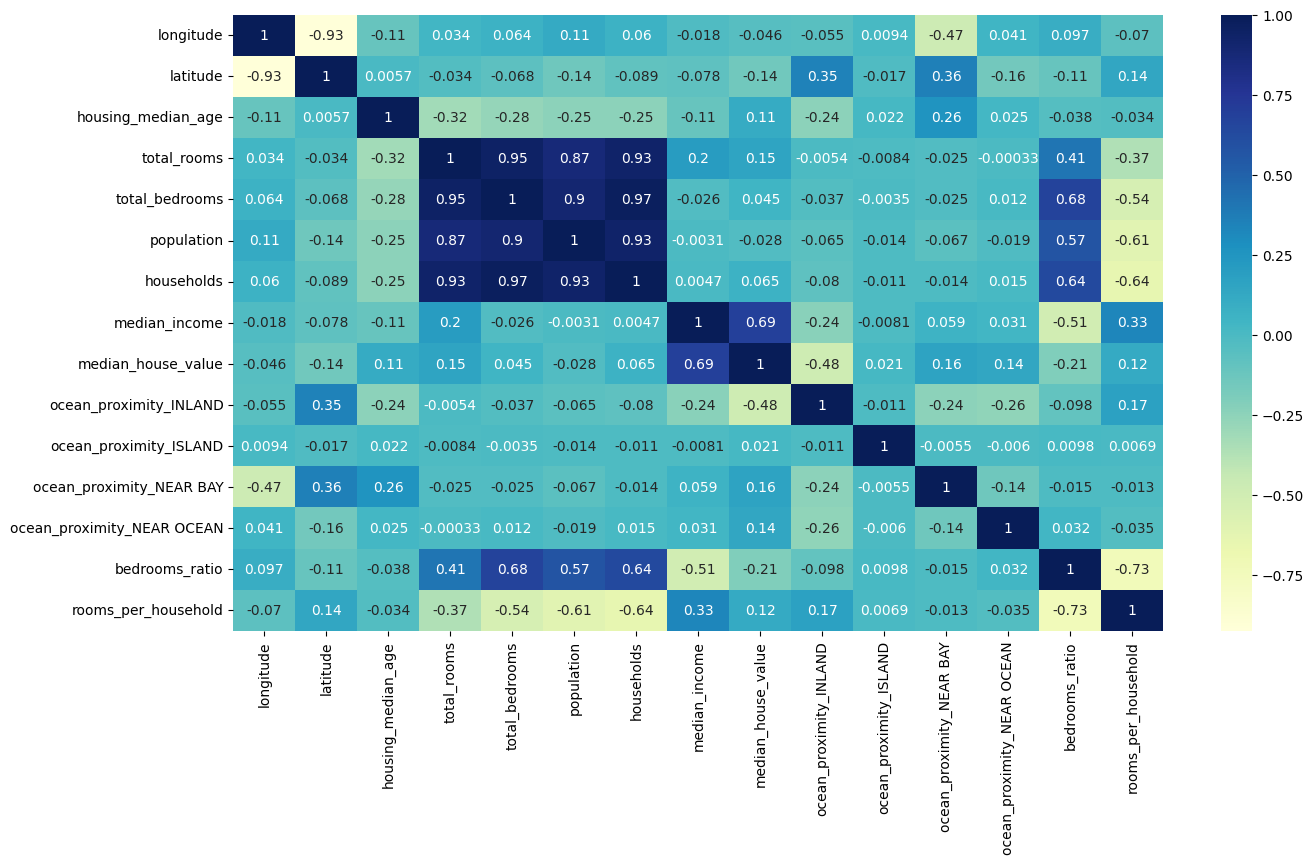

In [116]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr() , annot=True, cmap='YlGnBu')

In [117]:
from sklearn.linear_model import LinearRegression

x_train , y_train = train_data.drop('median_house_value', axis=1) , train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train , y_train)

LinearRegression()

In [118]:
test_data = x_test.join(y_test)
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19026,-122.00,38.35,34.0,432.0,65.0,208.0,71.0,5.5435,INLAND,136000.0
12186,-117.34,33.71,10.0,2591.0,486.0,1255.0,425.0,3.1513,<1H OCEAN,154300.0
12352,-116.54,33.81,31.0,6814.0,1714.0,2628.0,1341.0,2.1176,INLAND,124100.0
4756,-118.34,34.05,41.0,2099.0,472.0,1369.0,465.0,2.7409,<1H OCEAN,167100.0
19095,-122.61,38.24,18.0,2933.0,481.0,1279.0,443.0,5.0849,<1H OCEAN,188500.0
...,...,...,...,...,...,...,...,...,...,...
4330,-118.31,34.08,31.0,2275.0,823.0,2189.0,720.0,1.7542,<1H OCEAN,287500.0
13565,-117.29,34.16,38.0,2458.0,488.0,1135.0,453.0,2.8750,INLAND,99100.0
7552,-118.18,33.91,41.0,1260.0,299.0,1535.0,322.0,3.0134,<1H OCEAN,128100.0
8011,-118.12,33.85,37.0,2584.0,453.0,1333.0,481.0,4.3661,<1H OCEAN,219900.0


In [119]:
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

# Apply one-hot encoding to the 'ocean_proximity' column
test_data = pd.get_dummies(test_data, columns=['ocean_proximity'], drop_first=True)

# Display the first few rows of the encoded dataframe to verify the changes
display(test_data.head())

test_data['bedrooms_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['rooms_per_household'] = test_data['total_rooms'] / test_data['households']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
19026,-122.00,38.35,34.0,6.070738,4.189655,5.342334,4.276666,5.5435,136000.0,True,False,False,False
12186,-117.34,33.71,10.0,7.860185,6.188264,7.135687,6.054439,3.1513,154300.0,False,False,False,False
12352,-116.54,33.81,31.0,8.826881,7.447168,7.874359,7.201916,2.1176,124100.0,True,False,False,False
4756,-118.34,34.05,41.0,7.649693,6.159095,7.222566,6.144186,2.7409,167100.0,False,False,False,False
19095,-122.61,38.24,18.0,7.984122,6.177944,7.154615,6.095825,5.0849,188500.0,False,False,False,False


In [120]:
x_test , y_test = test_data.drop('median_house_value', axis=1) , test_data['median_house_value']

In [121]:
reg.score(x_test , y_test)

0.6847055604742569

In [122]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train , y_train)

RandomForestRegressor()

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [123]:
forest.fit(x_train , y_train)

RandomForestRegressor()

In [125]:
forest.score(x_test, y_test)

0.8275791818646417

In [131]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_features": [2, 4],
    "max_depth": [None, 4 , 8]
}

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'max_features': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [133]:
best_forest = grid_search.best_estimator_

In [134]:
best_forest.score(x_test_scaled, y_test)

0.8189844833611144